# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# importing the dataset to explore

In [2]:
car_data=pd.read_csv(r"C:\Users\fathi\OneDrive\Desktop\ICT\car_age_price.csv")
car_data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
car_data.describe

<bound method NDFrame.describe of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

# plotting the data

<Axes: >

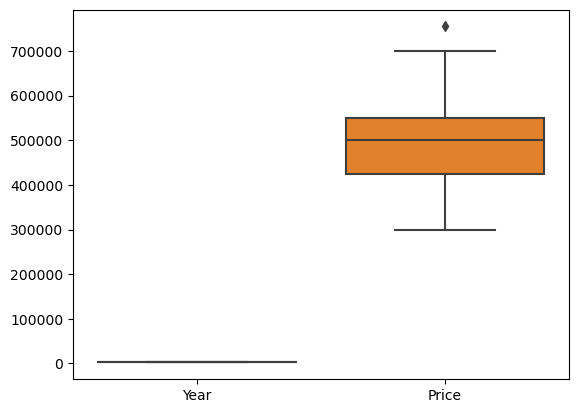

In [5]:
sns.boxplot(car_data)

In [6]:
z_scores=zscore(car_data.Price)
threshold=2.5
outlier=car_data[(z_scores > threshold)|(z_scores < -threshold)]
outlier

,Year,Price
1,2019,755000


In [7]:
car_data.drop(outlier.index,inplace=True)
car_data

,Year,Price
0,2018,465000
2,2019,700000
3,2018,465000
4,2018,465000
5,2015,350000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


<Axes: >

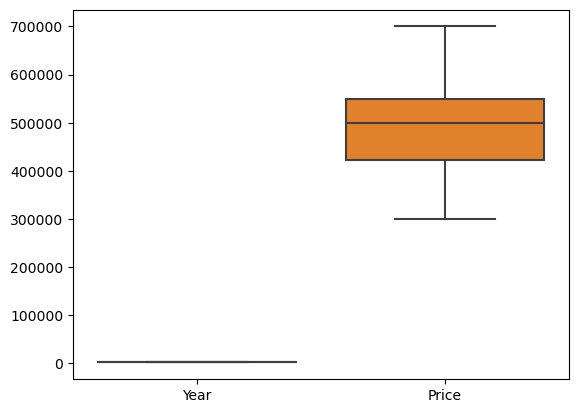

In [8]:
sns.boxplot(car_data)

<Axes: >

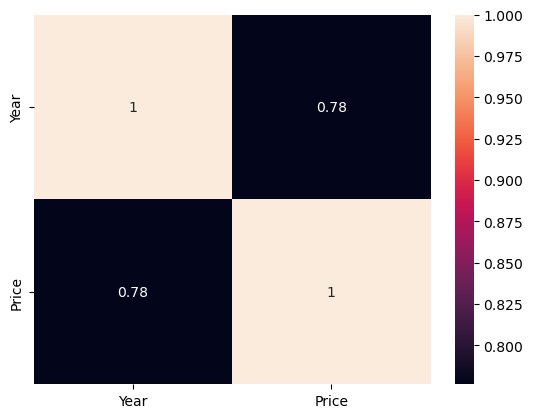

In [9]:
sns.heatmap(car_data.corr(),annot=True)

# linear regression

In [11]:
# Split the data into features as(X) and target variable as (y)
x = car_data.Year.values.reshape(-1,1)
y = car_data.Price.values.reshape(-1,1)
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.1)

In [12]:
#import the linear model
lin_reg=linear_model.LinearRegression()
lin_model=lin_reg.fit(x_train,y_train)

In [13]:
y_pred=lin_model.predict(x_test)

In [14]:
mse_linear=mean_squared_error(y_test,y_pred)
mse_linear

3338906493.509718

In [15]:
r2_linear=r2_score(y_test,y_pred)
r2_linear

0.6496821180237167

# Predict the possible price of a 2022 model second-hand grand i10

In [16]:
x_new=pd.DataFrame({'Year':[2022]}).values.reshape(-1,1)

In [17]:
y_pred=lin_model.predict(x_new)
y_pred

array([[703683.55915196]])

# lasso regresssion

In [18]:
lasso = linear_model.Lasso(alpha=1)
lasso_model=lasso.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

In [19]:
mse_lasso=mean_squared_error(y_test,y_pred)
mse_lasso

3338929332.0418153

In [20]:
r2_lasso=r2_score(y_test,y_pred)
r2_lasso

0.6496797218062104

In [21]:
r2_linear

0.6496821180237167

In [22]:
r2_lasso

0.6496797218062104